In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv("housing.csv")

In [4]:
housing.tail()
#medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.shape

(20640, 10)

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.info()
#there are missing values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

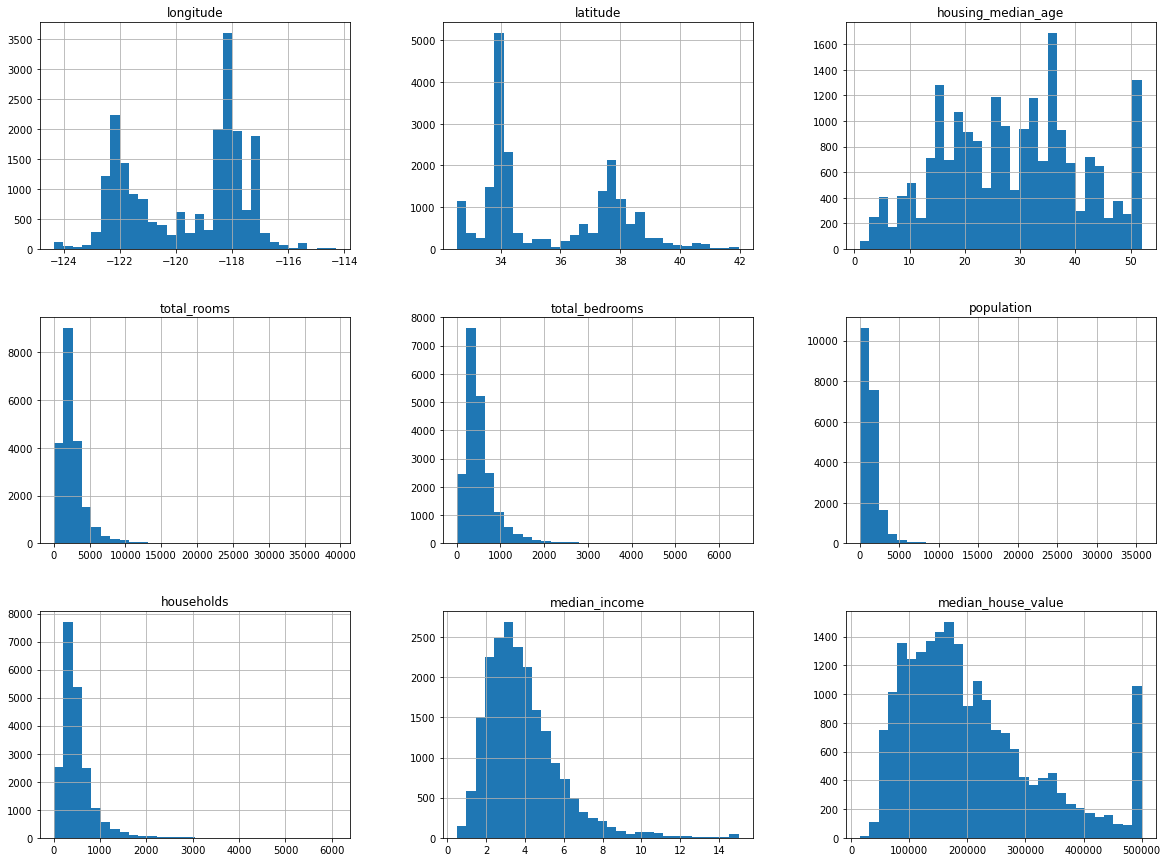

In [9]:
housing.hist(bins=30, figsize=(20,15))

In [10]:
#there are some outliers in median house value, we will remove those later in feature engineering

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

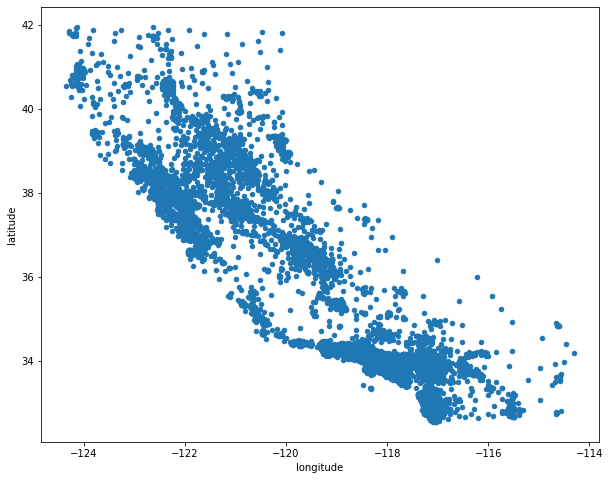

In [11]:
housing.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

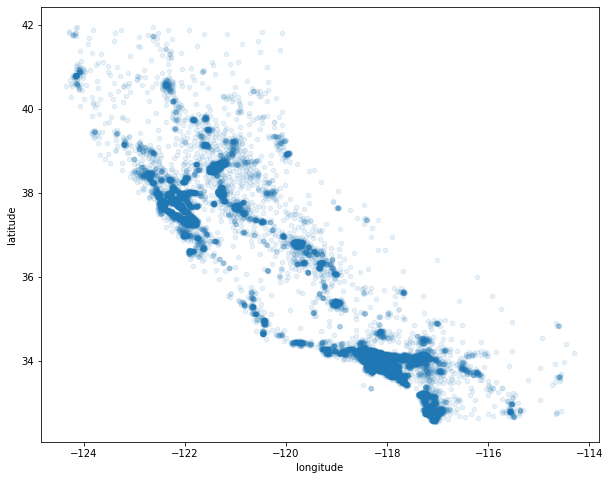

In [12]:
housing.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,8),alpha=0.1)
#using alpha shows high density area

<Figure size 720x504 with 0 Axes>

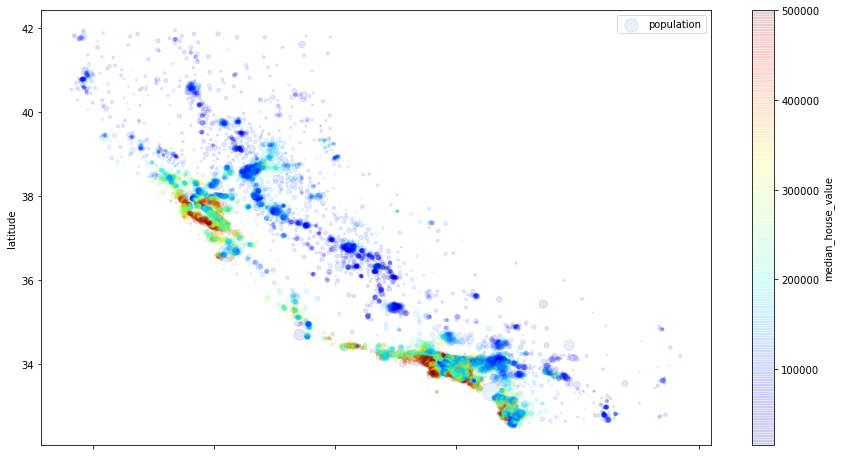

In [13]:
plt.figure(figsize=(10,7))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
        s=housing["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()

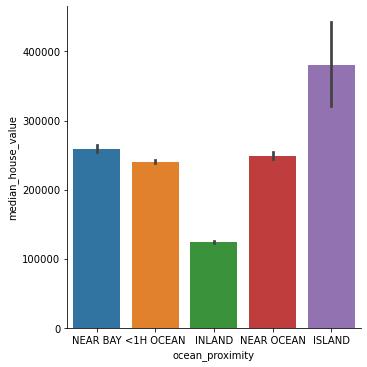

In [14]:
#plotting catagorical data with median house value
sns.catplot(x="ocean_proximity", y="median_house_value",kind="bar", data=housing)
#inland houses has lower median house value

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

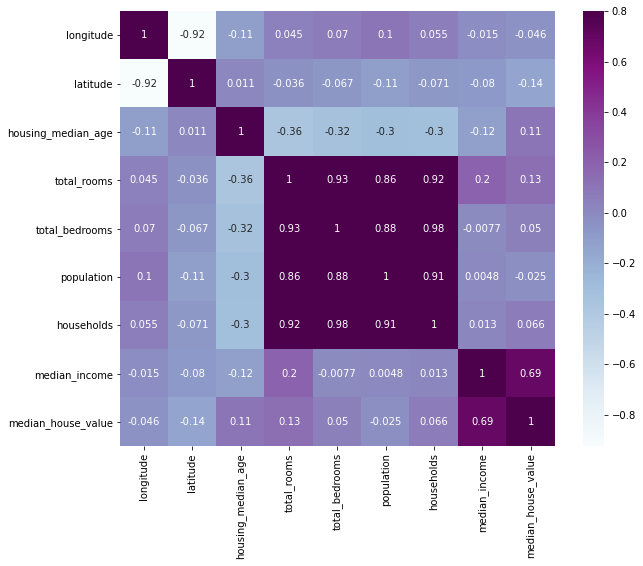

In [17]:
#visualizing using seaborn heatmap
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

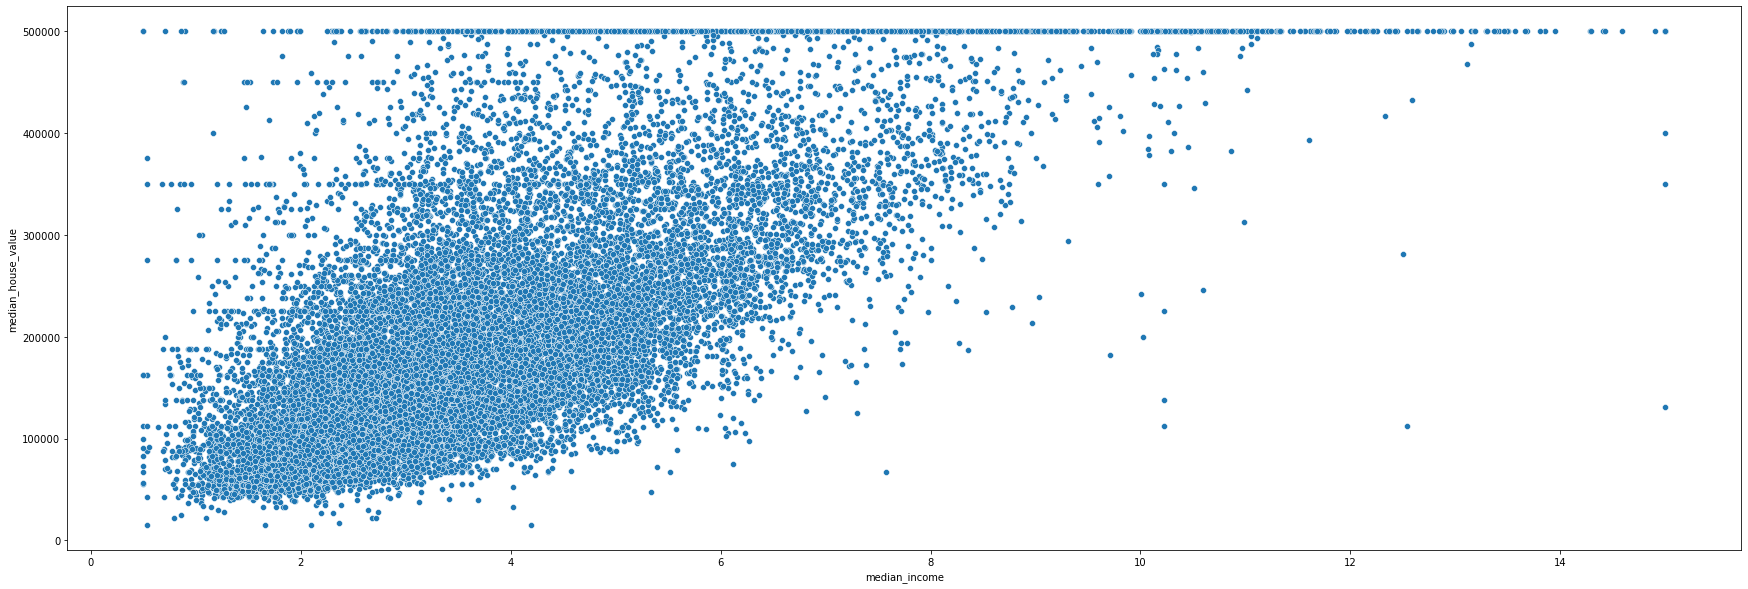

In [18]:
# Plot median_house_value against median_income since they have relatively strong correlation between them
fig=plt.figure(figsize=(30,10))
sns.scatterplot(x="median_income", y = "median_house_value", data= housing)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

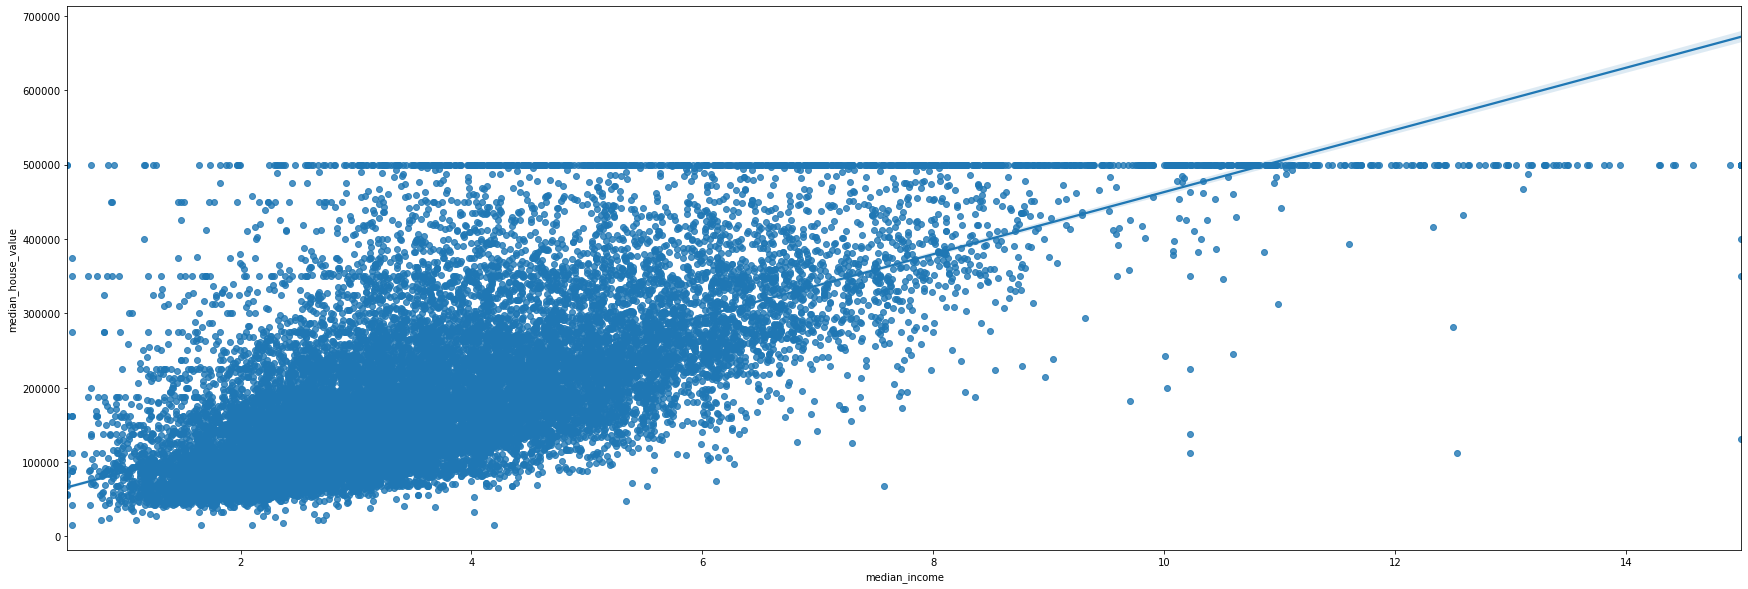

In [19]:
fig=plt.figure(figsize=(30,10))
sns.regplot(x="median_income",y="median_house_value", data=housing )

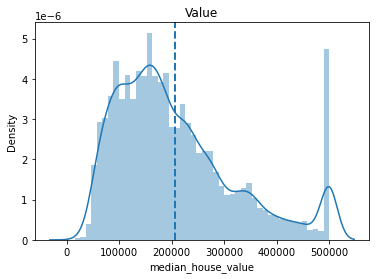

In [20]:
sns.distplot(housing['median_house_value'])
plt.axvline(x=housing['median_house_value'].mean(), linestyle='--', linewidth=2)
plt.title('Value');

In [21]:
print('skew: {}'.format(housing['median_house_value'].skew()))

skew: 0.9777632739098341


In [22]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
housing_full = housing.dropna(subset=['total_bedrooms'])

In [24]:
housing_full.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
#changins catagorical data to numeric using dummies
dummies = pd.get_dummies(housing_full.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [26]:
#concating dummies to original data set
housing_num = pd.concat([housing_full, dummies], axis='columns')

In [27]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [28]:
#dropping ocean_proximity with catagorical variable so we can run OLS regression and dropping island column since there are 
# only 5 observation
housing_final = housing_num.drop(['ocean_proximity','ISLAND'], axis='columns')

In [29]:
housing_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [30]:
#outliner removal from median_house_value
  
count = len([i for i in housing_final["median_house_value"] if i == 500001.000000])
print(count)

#965 houses with same median house value doesn't seems right

958


In [31]:
# housing_final["median_house_value"]= [i for i in housing["median_house_value"] if i < 500001.000000]
        
housing_end = housing_final[housing_final.median_house_value < 500000]

In [32]:
count_final = len([i for i in housing_end["median_house_value"] if i == 500001.000000])
print(count_final)

0


<AxesSubplot:>

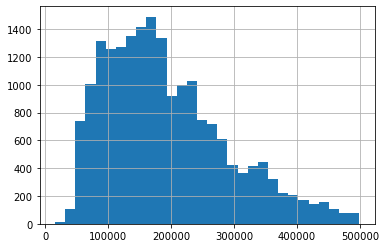

In [33]:
housing_end["median_house_value"] .hist(bins=30)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

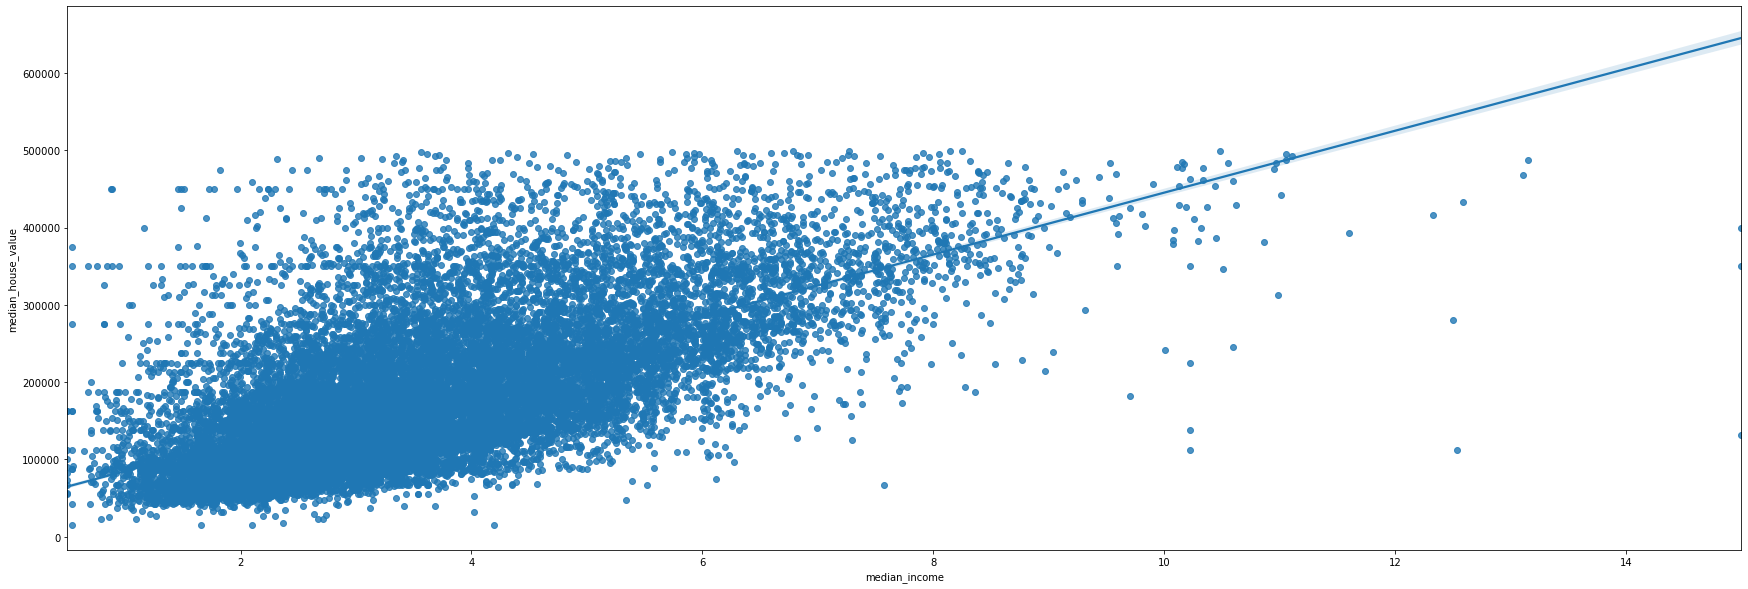

In [34]:
fig=plt.figure(figsize=(30,10))
sns.regplot(x="median_income",y="median_house_value", data=housing_end )

In [35]:
housing_end.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000
mean,-119.563485,35.653467,28.364716,2621.072090,539.645825,1440.852016,501.099907,3.676430,192017.667421,0.436857,0.332579,0.106386,0.123920
std,2.005890,2.150518,12.510260,2185.975435,422.553057,1144.831193,383.334391,1.569596,97095.550517,0.496010,0.471149,0.308339,0.329499
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,797.000000,282.000000,2.526275,116400.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450750,173700.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.990000,37.730000,37.000000,3119.000000,648.000000,1744.250000,606.000000,4.583300,247800.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
housing_end["rooms_per_household"] = housing_end["total_rooms"]/housing_end["households"]
housing_end["bedrooms_per_room"] = housing_end["total_bedrooms"]/housing_end["households"]
housing_end["population_per_household"]=housing_end["population"]/housing_end["households"]


In [37]:
corr_end = housing_end.corr()
corr_end["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.646887
<1H OCEAN                   0.288497
NEAR BAY                    0.155921
total_rooms                 0.144051
NEAR OCEAN                  0.132956
rooms_per_household         0.110931
households                  0.094630
total_bedrooms              0.075219
housing_median_age          0.065761
population                  0.012789
population_per_household   -0.021125
longitude                  -0.045250
bedrooms_per_room          -0.061482
latitude                   -0.149614
INLAND                     -0.499802
Name: median_house_value, dtype: float64

In [38]:
### X = housing_end.drop(["median_house_value"],axis=1)
### y = housing_end[["median_house_value"]]

In [39]:
df_train, df_test = train_test_split(housing_end, test_size= 0.25, random_state= 123)

### Scaling Data

In [40]:
housing_end.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# Create a scaling object
scaler = StandardScaler()
# Create a list of the variables that you need to scale
varlist = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [43]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
10124,0.826317,-0.799546,-0.596340,-0.020049,-0.414615,-0.201850,-0.391528,1.637604,1.021709,1.127499,-0.701551,-0.344697,-0.375205,0.860963,-0.125908,0.026476
14130,1.235697,-1.342892,-1.479496,-0.317010,0.084619,0.133088,0.110527,-1.373513,-0.756189,-0.886918,-0.701551,-0.344697,2.665208,-0.781529,-0.079839,-0.016356
17572,-1.175654,0.774765,0.848826,-0.808624,-0.668899,-0.636060,-0.592350,-0.095745,0.002683,1.127499,-0.701551,-0.344697,-0.375205,-0.975369,-0.346548,-0.044121
12275,1.295607,-0.785614,-1.318922,1.472901,1.589322,1.339037,1.670760,-0.792628,-0.825084,-0.886918,1.425413,-0.344697,-0.375205,-0.106188,-0.073497,-0.043199
20614,-0.985941,1.592106,-0.194905,-0.156760,-0.188327,0.012234,-0.072272,-0.768855,-1.381384,-0.886918,1.425413,-0.344697,-0.375205,-0.236008,-0.268301,-0.004620


In [45]:
# Split the train dataset into X and y

y_train = df_train.pop('median_house_value')
X_train = df_train